In [1]:
import pyforest

In [2]:
np.linspace(-4, 4, 5)

<IPython.core.display.Javascript object>

array([-4., -2.,  0.,  2.,  4.])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

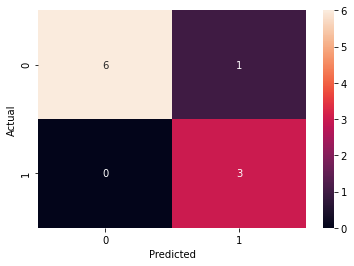

<IPython.core.display.Javascript object>

Accuracy score:  0.9


<Figure size 432x288 with 0 Axes>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])

X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()
plt.savefig("figures/confmat_test.png")

acc_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score: ", acc_score)

In [16]:
new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates, columns = ['gmat', 'gpa','work_experience'])
df3 = df2.values

y_pred2 = log_reg.predict(df2)

results = np.hstack((df3, y_pred2[:, np.newaxis]))
print(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[[590.    2.    3.    0. ]
 [740.    3.7   4.    1. ]
 [680.    3.3   6.    1. ]
 [610.    2.3   1.    0. ]
 [710.    3.    5.    1. ]]


In [13]:
df3 = df2.values
df3

array([[590. ,   2. ,   3. ],
       [740. ,   3.7,   4. ],
       [680. ,   3.3,   6. ],
       [610. ,   2.3,   1. ],
       [710. ,   3. ,   5. ]])

In [17]:
y_pred2

array([0, 1, 1, 0, 1], dtype=int64)

In [14]:
y_pred2[:, np.newaxis]

<IPython.core.display.Javascript object>

array([[0],
       [1],
       [1],
       [0],
       [1]], dtype=int64)

In [15]:
np.hstack((df3, y_pred2[:, np.newaxis]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[590. ,   2. ,   3. ,   0. ],
       [740. ,   3.7,   4. ,   1. ],
       [680. ,   3.3,   6. ,   1. ],
       [610. ,   2.3,   1. ,   0. ],
       [710. ,   3. ,   5. ,   1. ]])

In [18]:
df[['admitted']].head()

,admitted
0,1
1,1
2,0
3,1
4,0


Implement logistic-regression-stochastic-gradient-descent scratch

In [21]:
from math import exp

# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]     # y-intercept
    for i in range(len(row) - 1):
        yhat += coefficients[i+1] * row[i]
    return 1.0/(1.0 + exp(-yhat))

# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, learning_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)   # sigmoid function
            error = row[-1] - yhat      # last column := target
            sum_error += error**2
            coef[0] = coef[0] + learning_rate * error * yhat * (1 - yhat)
            '''
            yhat * (1 - yhat) := differentiation of yhat
            gradient
            '''            
            for i in range(len(row)-1):
                coef[i+1] = coef[i+1] + learning_rate * error * yhat * (1.0-yhat) * row[i]
        print('>epoch=%d, learning_rate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
    return coef

# Calculate coefficients
dataset = [[2.7810836,2.550537003,0],
           [1.465489372,2.362125076,0],
           [3.396561688,4.400293529,0],
           [1.38807019,1.850220317,0],
           [3.06407232,3.005305973,0],
           [7.627531214,2.759262235,1],
           [5.332441248,2.088626775,1],
           [6.922596716,1.77106367,1],
           [8.675418651,-0.242068655,1],
           [7.673756466,3.508563011,1]]
learning_rate = 0.3
n_epoch = 10
coef = coefficients_sgd(dataset, learning_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.300, error=2.217
>epoch=1, lrate=0.300, error=1.613
>epoch=2, lrate=0.300, error=1.113
>epoch=3, lrate=0.300, error=0.827
>epoch=4, lrate=0.300, error=0.623
>epoch=5, lrate=0.300, error=0.494
>epoch=6, lrate=0.300, error=0.412
>epoch=7, lrate=0.300, error=0.354
>epoch=8, lrate=0.300, error=0.310
>epoch=9, lrate=0.300, error=0.276
[-0.4066054639903037, 0.8525733163581036, -1.1047462590413233]


In [38]:
from math import exp

SIGMOID = 1
STEP = 2
LINEAR = 3

random.seed()

class LogisticRegression:
    
    def __init__(self, num_epocs, train_data, test_data, num_features, learn_rate):
        self.train_data = train_data
        self.test_data = test_data
        self.num_features = num_features
        self.num_outputs = self.train_data.shape[1] - num_features   # number of targets
        self.num_train = self.train_data.shape[0]    # number of rows
        self.w = np.random.uniform(-0.5, 0.5, num_features)
        self.b = np.random.uniform(-0.5, 0.5, self.num_outputs)
        self.learn_rate = learn_rate
        self.max_epoch = num_epocs
        self.use_activation = SIGMOID
        self.out_delta = np.zeros(self.num_outputs)
        
        print("self.w init: ", self.w)
        print("self.b init: ", self.b)
        print("out_delta: ", self.out_delta)
        
    def activation_func(self, z_vec):
        if self.use_activation == SIGMOID:
            y = 1 / (1 + np.exp(z_vec))    # sigmoid function
        elif self.use_activation == STEP:
            y = (z_vec > 0).astype(int)    # if greater than 0, use 1, else 0
        else:
            y = z_vec
        return y
    
    def predict(self, x_vec):
        z_vec = x_vec.dot(self.w) - self.b   # linear output
        output = self.activation_func(z_vec)
        return output
    
    def gradient(self, x_vec, output, actual):
        if self.use_activation == SIGMOID:
            out_delta = (output - actual) * (output * (1 - output))
        else:
            out_delta = output - actual
        return out_delta
    
    def update(self, x_vec, output, actual):
        self.w += self.learn_rate * (x_vec * self.out_delta)
        self.b += (1 * self.learn_rate * self.output_delta)
        
    def squared_error(self, prediction, actual):
        return np.sum(np.square(prediction - actual))/prediction.shape[0]
    
    def test_model(self, data, tolerance):
        num_instances = data.shape[0]   # number of rows
        class_perf = 0
        sum_sqer = 0
        
        for s in range(num_instances):
            input_instance = self.train_data[s, 0:self.num_features]
            actual = self.train_data[s, self.num_features:]
            prediction = self.predict(input_instance)
            sum_sqer += self.squared_error(prediction, actual)
            
            pred_binary = np.where(prediction > (1 - tolerance), 1, 0)
            
            print('s, actual, prediction, sum_sqer: \n', s, actual, prediction, pred_binary, sum_sqer)
            
            if (actual == pred_binary).all():
                class_perf += 1
                
        rmse = np.sqrt(sum_sqer/num_instances)
        percentage_correct = float(class_perf/num_instances)*100
        print("class_perf, rmse\n", percentage_correct, rmse)
        return rmse, percentage_correct
    
    def SGD(self):
        epoch = 0
        shuffle = True
        while epoch < self.max_epoch:
            sum_sqer = 0
            for s in range(self.num_train):    # num_train := number of rows
                if shuffle == True:
                    i = random.randint(0, self.num_train-1)  # generate a random integer between 0 and (self.num_train-1)
                input_instance = self.train_data[i, 0:self.num_features]
                actual = self.train_data[i, self.num_features:]
                prediction = self.predict(input_instance)
                sum_sqer += self.squared_error(prediction, actual)
                self.out_delta = self.gradient(input_instance, prediction, actual)
                self.update(input_instance, prediction, actual)
                
            print(epoch, sum_sqer, self.w, self.b)
            epoch += 1
            
        rmse_train, train_perc = self.test_model(self.train_data, 0.3)
        rmse_test = 0
        test_perc = 0
        return train_perc, test_perc, rmse_train, rmse_test
    
    def GD(self):
        epoch = 0
        while epoch < self.max_epoch:
            sum_sqer = 0
            for s in range(self.num_train):
                input_instance = self.train_data[s, 0:self.num_features]
                actual = self.train_data[s, self.num_features:]
                prediction = self.predict(input_instance)
                sum_sqer += self.squared_error(prediction, actual)
                self.out_delta += self.gradient(input_instance, prediction, actual)
            self.update(input_instance, prediction, actual)
            
            print(epoch, sum_sqer, self.w, self.b)
            epoch += 1
            
        rmse_train, train_perc = self.test_model(self.train_data, 0.3)
        rmse_test = 0
        test_perc = 0
        return train_perc, test_perc, rmse_train, rmse_test
    
    def main():
        random.seed()
        dataset = [[2.7810836,2.550537003,0],
                    [1.465489372,2.362125076,0],
                    [3.396561688,4.400293529,0],
                    [1.38807019,1.850220317,0],
                    [3.06407232,3.005305973,0],
                    [7.627531214,2.759262235,1],
                    [5.332441248,2.088626775,1],
                    [6.922596716,1.77106367,1],
                    [8.675418651,-0.242068655,1],
                    [7.673756466,3.508563011,1]]
        
        train_data = np.asarray(dataset)
        test_data = train_data
        
        learn_rate = 0.3
        num_features = 2
        num_epochs = 20
        
        print(train_data)
        
        log_reg = LogisticRegression(num_epocs, train_data, test_data, num_features, learn_rate)
        train_perc, test_perc, rmse_train, rmse_test = log_reg.SGD()
        train_perc, test_perc, rmse_train, rmse_test = log_reg.GD()
        
        xor_dataset = [[0,0,0],
                       [0,1,1],
                       [1,0,1],
                       [1,1,0]]

    xor_data = np.asarray(xor_dataset)   # convert list data to numpy
    
    num_epocs = 20
    learn_rate = 0.9
    num_features = 2
    
    log_reg = LogisticRegression(num_epocs, xor_data, xor_data, num_features, learn_rate)
    (train_perc, test_perc, rmse_train, rmse_test) = log_reg.SGD()
    (train_perc, test_perc, rmse_train, rmse_test) = log_reg.GD() 


if __name__ == "__main__":
    main()

<IPython.core.display.Javascript object>

D:\Users\dimao\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass dual=[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]], tol=[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]], C=2, fit_intercept=0.9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


AttributeError: 'LogisticRegression' object has no attribute 'SGD'

In [29]:
import random
random.randint(0, 9)

8

In [33]:
xor_dataset = [[0,0,0],
               [0,1,1],
               [1,0,1],
               [1,1,0]]
type(xor_dataset)

list

In [34]:
np.asarray(xor_dataset)

<IPython.core.display.Javascript object>

array([[0, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]])